# **Generating Taxonomic Profile from Microbiome Data**

## **1. Importing data (generate artifact)**

In [5]:
##### FASTAQ to Artifact #####
# import the fasta files into a QIIME2 artifact
!qiime tools import \
  --type 'SampleData[SequencesWithQuality]' \
  --input-format SingleEndFastqManifestPhred33V2 \
  --input-path manifest.tsv \
  --output-path sequences.qza

Imported manifest.tsv as SingleEndFastqManifestPhred33V2 to sequences.qza


In [6]:
##### Artifact to Visualization #####
# QIIME to visualize our sequencing data.
!qiime demux summarize \
	--i-data sequences.qza \
	--o-visualization qualities.qzv

Saved Visualization to: qualities.qzv


In [159]:
# visualize
!qiime tools view qualities.qzv

Press the 'q' key, Control-C, or Control-D to quit. This view may no longer be accessible or work correctly after quitting.Opening in existing browser session.

Press the 'q' key, Control-C, or Control-D to quit. This view may no longer be accessible or work correctly after quitting.

## **2. Denoise/Demultiplex data**

In [8]:
##### Quality Filtering: From Sequence to ASV ##### Change the trunc-len to 250
!qiime dada2 denoise-single \
    --i-demultiplexed-seqs sequences.qza \
    --p-trunc-len 250 \
    --p-n-threads 4 \
    --output-dir dada --verbose

Running external command line application(s). This may print messages to stdout and/or stderr.
The command(s) being run are below. These commands cannot be manually re-run as they will depend on temporary files that no longer exist.

Command: run_dada.R --input_directory /tmp/qiime2/davo/data/356c47dc-2fe3-48f9-a044-3371720cda23/data --output_path /tmp/tmpbptgo5n3/output.tsv.biom --output_track /tmp/tmpbptgo5n3/track.tsv --filtered_directory /tmp/tmpbptgo5n3 --truncation_length 250 --trim_left 0 --max_expected_errors 2.0 --truncation_quality_score 2 --max_length Inf --pooling_method independent --chimera_method consensus --min_parental_fold 1.0 --allow_one_off False --num_threads 4 --learn_min_reads 1000000 --homopolymer_gap_penalty NULL --band_size 16

R version 4.3.3 (2024-02-29) 
Loading required package: Rcpp
DADA2: 1.30.0 / Rcpp: 1.0.13.1 / RcppParallel: 5.1.9 
2) Filtering ............................................................................................................

## **3. Generating Feature table (OTU)**

In [9]:
# Denoising statistics
!qiime metadata tabulate \
    --m-input-file dada/denoising_stats.qza \
    --o-visualization denoising-stats.qzv

Saved Visualization to: denoising-stats.qzv


In [160]:
# visualize 
!qiime tools view denoising-stats.qzv

Press the 'q' key, Control-C, or Control-D to quit. This view may no longer be accessible or work correctly after quitting.Opening in existing browser session.

Press the 'q' key, Control-C, or Control-D to quit. This view may no longer be accessible or work correctly after quitting.

In [10]:
# Feature table summary
!qiime feature-table summarize \
  --i-table ./dada/table.qza \
  --m-sample-metadata-file ./metadata.tsv \
  --o-visualization ./dada_freqtable.qzv

Saved Visualization to: ./dada_freqtable.qzv


In [161]:
# visualize 
!qiime tools view ./dada_freqtable.qzv

Press the 'q' key, Control-C, or Control-D to quit. This view may no longer be accessible or work correctly after quitting.Opening in existing browser session.

Press the 'q' key, Control-C, or Control-D to quit. This view may no longer be accessible or work correctly after quitting.

In [162]:
# Export feature table
!qiime tools export \
  --input-path dada/table.qza \
  --output-path exported_table

Exported dada/table.qza as BIOMV210DirFmt to directory exported_table


## **4. Taxonomic Classification (math features to labels)**

### **a. Silva 138 99% OTUs full-length sequences**

In [ ]:
# get the classifier
!wget -nv -O \
  "classifier/silva-138-99-nb-classifier.qza" \
  "https://data.qiime2.org/classifiers/sklearn-1.4.2/silva/silva-138-99-nb-classifier.qza"

2024-12-08 05:50:58 URL:https://s3-us-west-2.amazonaws.com/qiime2-data/classifiers/sklearn-1.4.2/silva/silva-138-99-nb-classifier.qza [218245868/218245868] -> "silva-138-99-515-806-nb-classifier.qza" [1]


In [163]:
# Get taxonomic OTU
!qiime feature-classifier classify-sklearn \
  --i-classifier classifier/silva-138-99-nb-classifier.qza \
  --i-reads ./dada/representative_sequences.qza \
  --o-classification silva-taxonomy.qza

Saved FeatureData[Taxonomy] to: silva-taxonomy.qza


In [164]:
# Export TSV
!qiime tools export \
  --input-path silva-taxonomy.qza \
  --output-path exported_table

Exported silva-taxonomy.qza as TSVTaxonomyDirectoryFormat to directory exported_table


In [3]:
!qiime feature-table summarize \
  --i-table genus-table.qza \
  --o-visualization genus-table-summary.qzv

Saved Visualization to: genus-table-summary.qzv


In [4]:
# visualize empress
!qiime tools view genus-table-summary.qzv

Press the 'q' key, Control-C, or Control-D to quit. This view may no longer be accessible or work correctly after quitting.Opening in existing browser session.

Press the 'q' key, Control-C, or Control-D to quit. This view may no longer be accessible or work correctly after quitting.

In [2]:
# genus strata
!qiime taxa collapse \
  --i-table ./dada/table.qza \
  --i-taxonomy silva-taxonomy.qza \
  --p-level 6 \
  --o-collapsed-table genus-table.qza

Saved FeatureTable[Frequency] to: genus-table.qza


In [ ]:
# generate vizualization
!qiime taxa barplot \
  --i-table ./dada/table.qza  \
  --i-taxonomy silva-taxonomy.qza \
  --m-metadata-file metadata.tsv \
  --o-visualization taxa-barplot.qzv

Saved Visualization to: taxa-barplot.qzv


In [218]:
# visualize empress
!qiime tools view taxa-barplot.qzv

Press the 'q' key, Control-C, or Control-D to quit. This view may no longer be accessible or work correctly after quitting.Opening in existing browser session.

Press the 'q' key, Control-C, or Control-D to quit. This view may no longer be accessible or work correctly after quitting.

#### Get table for model

In [1]:
### Combine OTU and Taxonomy data
import biom
import pandas as pd
import numpy as np

# Load the OTU table
otu = biom.load_table('exported_table/feature-table.biom')
otu = otu.to_dataframe()

# Load the taxonomy table
taxonomy = pd.read_csv('exported_table/taxonomy.tsv', sep='\t', index_col=0)

# Merge the OTU table with the taxonomy table
otu_taxonomy_merged = pd.merge(taxonomy, otu, left_index=True, right_index=True)

# Save the merged table to a CSV file
otu_taxonomy_merged.to_csv('otu_with_taxonomy.csv')


In [2]:
# Split the 'Taxon' column into multiple columns
df_split = otu_taxonomy_merged['Taxon'].str.split(';', expand=True)

# Assign the split columns to the original dataframe
columns_to_update = ['Domain', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Species']
otu_taxonomy_merged[columns_to_update] = df_split

# Remove the first 3 characters from the specified columns
otu_taxonomy_merged[columns_to_update] = otu_taxonomy_merged[columns_to_update].apply(lambda x: x.str.slice(3))

# Replace empty strings with np.nan in the specified columns
otu_taxonomy_merged[columns_to_update] = otu_taxonomy_merged[columns_to_update].replace('' or 'ssigned', None)

In [3]:
# Reorder columns to place columns_to_update after the 'Taxon' column
cols = ['Taxon'] + columns_to_update + [col for col in otu_taxonomy_merged.columns if col not in ['Taxon'] + columns_to_update]
otu_taxonomy_merged = otu_taxonomy_merged[cols]

otu_taxonomy_merged

,Taxon,Domain,Phylum,Class,Order,Family,Genus,Species,Confidence,206534,...,222171,224323,224324,224325,224326,224327,224328,224330,224844,224845
668fdb718997fc1589c7817655d4bb5f,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,,0.999984,6.0,...,0,8122.0,12783.0,6685.0,5904.0,10805.0,12100.0,17885.0,1708.0,6589.0
a3f36ef32153f2fc2aaeac2feb23777f,d__Bacteria;p__Firmicutes;c__Clostridia;o__Osc...,Bacteria,Firmicutes,Clostridia,Oscillospirales,Ruminococcaceae,Faecalibacterium,,0.990108,482.0,...,843.0,5435.0,4024.0,1374.0,1739.0,6074.0,6076.0,2694.0,4684.0,9331.0
9496d87b94d90dff068f0716603930bd,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,,0.999978,11952.0,...,0,50.0,0,0,10.0,6495.0,8555.0,0,0,0
1b158b8b2922d4fcad5d9cea607cbb7d,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,Bacteria,Proteobacteria,Gammaproteobacteria,Enterobacterales,Enterobacteriaceae,Escherichia-Shigella,,0.908560,1536.0,...,34.0,1926.0,2495.0,2329.0,2483.0,4712.0,4008.0,99.0,547.0,299.0
23fed68c6c76ab10ba1be8a43e9176e7,d__Bacteria;p__Firmicutes;c__Clostridia;o__Osc...,Bacteria,Firmicutes,Clostridia,Oscillospirales,Ruminococcaceae,Faecalibacterium,,0.996007,0,...,522.0,33.0,36.0,2154.0,2414.0,471.0,313.0,13.0,441.0,1034.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51946b237d59929b4f666bb5229fbacf,d__Bacteria;p__Firmicutes;c__Clostridia;o__Lac...,Bacteria,Firmicutes,Clostridia,Lachnospirales,Lachnospiraceae,Roseburia,,0.765569,0,...,0,0,0,0,0,0,0,0,0,2.0
2707ca30f01ee8e07aa645b208068852,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,Bacteria,Proteobacteria,Gammaproteobacteria,Burkholderiales,Rhodocyclaceae,None,None,0.984180,0,...,0,0,0,0,0,0,0,0,0,2.0
46b10e705d5fbdc5c8d8f3a24249591e,d__Bacteria;p__Firmicutes;c__Clostridia;o__Chr...,Bacteria,Firmicutes,Clostridia,Christensenellales,Christensenellaceae,Christensenellaceae_R-7_group,,0.822727,0,...,0,0,0,0,0,0,0,0,0,2.0
4c5ce916f019b3ba5d0fa994d24aee1a,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,Bacteria,Proteobacteria,Gammaproteobacteria,Burkholderiales,Sutterellaceae,Sutterella,,0.988518,0,...,0,0,0,0,0,0,0,0,0,2.0


#### Exploration

In [4]:
print(otu_taxonomy_merged['Confidence'].describe())

count    5350.000000
mean        0.948876
std         0.079536
min         0.315809
25%         0.927707
50%         0.992918
75%         0.999658
max         1.000000
Name: Confidence, dtype: float64


<Axes: >

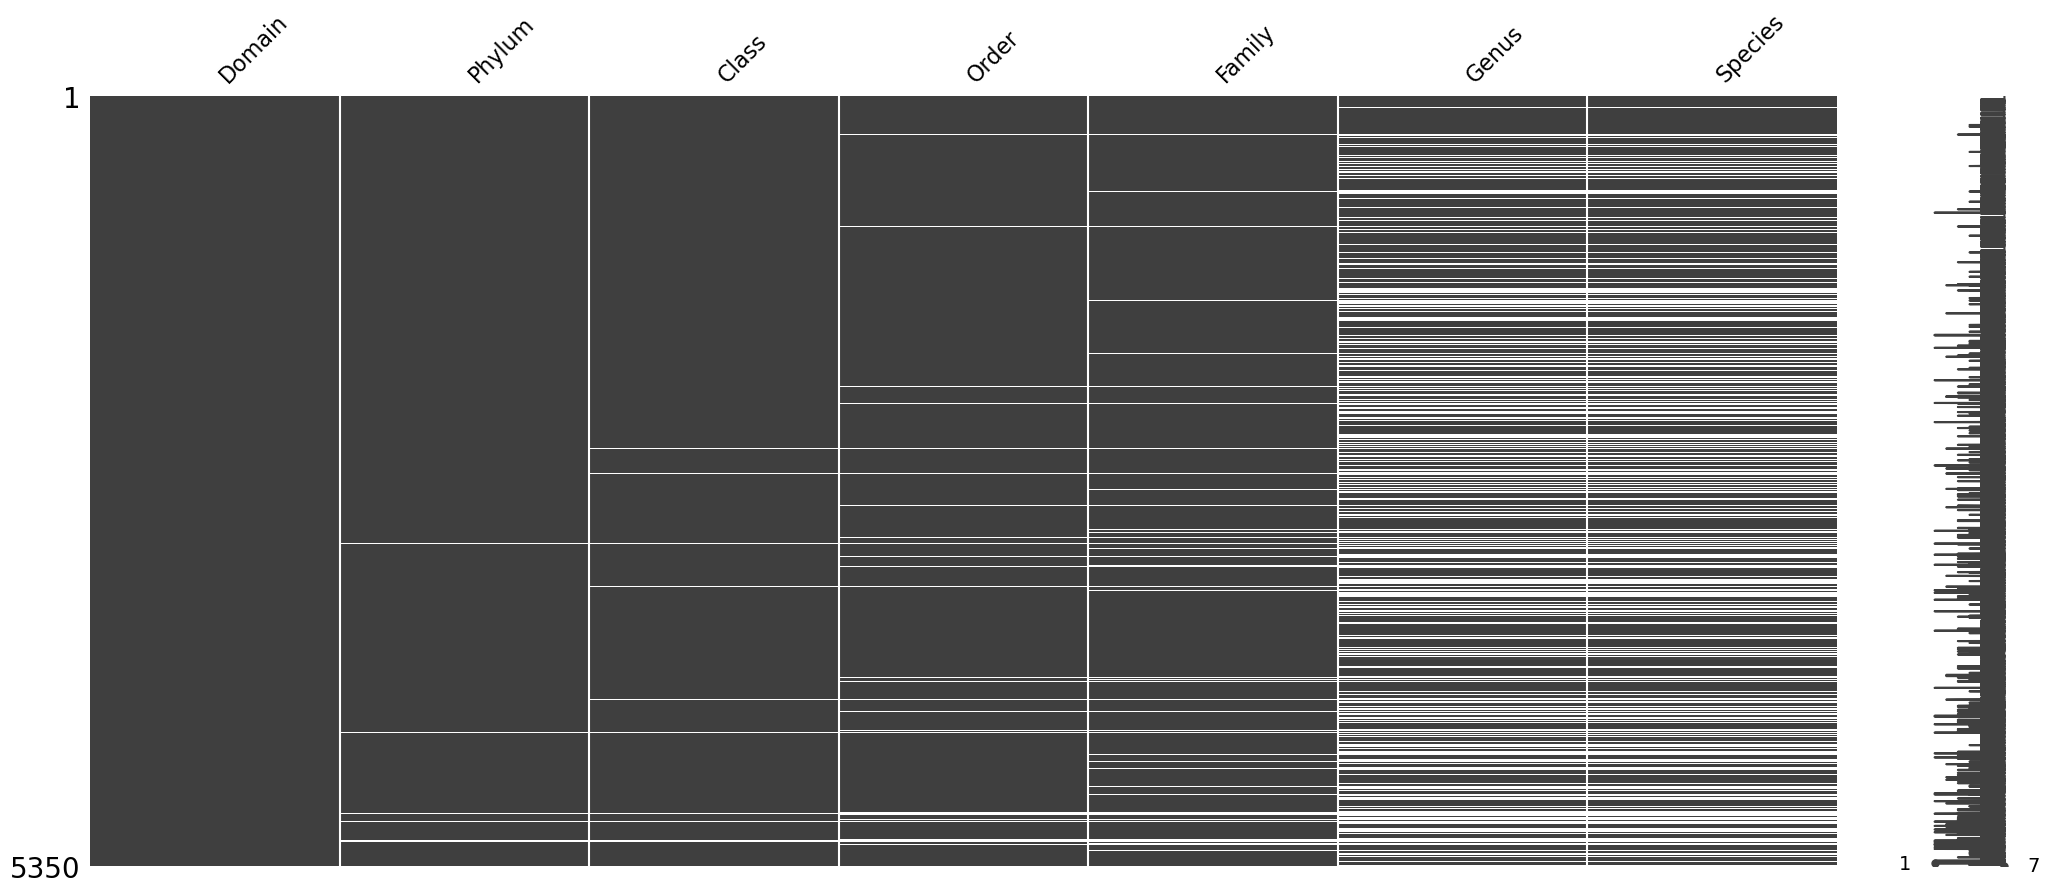

In [229]:
import missingno as msno

msno.matrix(otu_taxonomy_merged[columns_to_update])

In [5]:
# export csv
otu_taxonomy_merged.to_csv('otu_with_taxonomy.csv')

## **5. Alpha Rarefaction and Selecting a Rarefaction Depth**

In [17]:
# calculate rarefaction
!qiime diversity alpha-rarefaction \
  --i-table ./dada/table.qza \
  --m-metadata-file metadata.tsv \
	--p-min-depth 10 \
  --p-max-depth 4900 \
  --o-visualization alpha_rarefaction_curves.qzv

Saved Visualization to: alpha_rarefaction_curves.qzv


In [214]:
# visualize empress
!qiime tools view alpha_rarefaction_curves.qzv

Press the 'q' key, Control-C, or Control-D to quit. This view may no longer be accessible or work correctly after quitting.Opening in existing browser session.

Press the 'q' key, Control-C, or Control-D to quit. This view may no longer be accessible or work correctly after quitting.

## **6. Phylogenetics**

In [36]:
# Aligning sequences and constructing a phylogenetic tree with QIIME2
!qiime phylogeny align-to-tree-mafft-fasttree \
	--i-sequences dada/representative_sequences.qza \
	--output-dir tree

^C

Aborted!


In [14]:
# Visualization for the tree using the empress QIIME 2 plugin
!qiime empress tree-plot \
	--i-tree tree/rooted_tree.qza \
	--o-visualization tree/empress.qzv

Saved Visualization to: tree/empress.qzv


In [35]:
# expoert the table
!qiime tools export \
  --input-path taxonomy.qza \
  --output-path exported_table

Exported taxonomy.qza as TSVTaxonomyDirectoryFormat to directory exported_table


In [15]:
# visualize empress
!qiime tools view tree/empress.qzv

Press the 'q' key, Control-C, or Control-D to quit. This view may no longer be accessible or work correctly after quitting.Opening in existing browser session.

Press the 'q' key, Control-C, or Control-D to quit. This view may no longer be accessible or work correctly after quitting.